In [1]:
import pandas as pd
import numpy as np

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights_train.csv")
flights_test = pd.read_csv("flights_test.csv")

In [3]:
dfm = pd.read_csv("dfm.csv")

In [4]:
dfm.head()

,Unnamed: 0,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,0,2015,1,1,4,AS,98,N407AS,Anchorage,Seattle,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,2,2,2015,1,1,4,US,840,N171US,San Francisco,Charlotte,20,18.0,16.0,34.0,286.0,2296,806,5.0
2,5,5,2015,1,1,4,DL,806,N3730B,San Francisco,Minneapolis,25,20.0,18.0,38.0,217.0,1589,602,8.0
3,6,6,2015,1,1,4,NK,612,N635NK,Las Vegas,Minneapolis,25,19.0,11.0,30.0,181.0,1299,526,-17.0
4,7,7,2015,1,1,4,US,2013,N584UW,Los Angeles,Charlotte,30,44.0,13.0,57.0,273.0,2125,803,-10.0


In [5]:
dfm = dfm.drop(['Unnamed: 0'], axis =1)

In [6]:
dfm.head(2)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,Anchorage,Seattle,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,2,2015,1,1,4,US,840,N171US,San Francisco,Charlotte,20,18.0,16.0,34.0,286.0,2296,806,5.0


In [7]:
dfm['FLIGHT_STATUS'] = np.where(dfm['ARRIVAL_DELAY'] > 0, 1, 0)

In [8]:
dfm.head(2)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,FLIGHT_STATUS
0,0,2015,1,1,4,AS,98,N407AS,Anchorage,Seattle,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,0
1,2,2015,1,1,4,US,840,N171US,San Francisco,Charlotte,20,18.0,16.0,34.0,286.0,2296,806,5.0,1


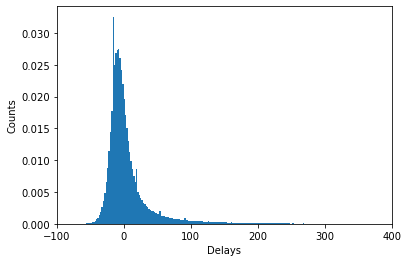

In [9]:
import matplotlib.pyplot as plt

plt.hist(dfm["ARRIVAL_DELAY"], density= True, bins=1000)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Delays')
plt.xlim([-100, 400])
plt.show()


In [10]:
max(dfm["SCHEDULED_ARRIVAL"])

2359

In [11]:
dfm["SCHEDULED_DEPT_MIN"] = ((dfm["SCHEDULED_DEPARTURE"]/100).apply(np.floor)*60) + dfm["SCHEDULED_DEPARTURE"].mod(100)

dfm["DEPT_TIME_MIN"] = ((dfm["DEPARTURE_TIME"]/100).apply(np.floor)*60) + dfm["DEPARTURE_TIME"].mod(100)

dfm["SCHEDULED_ARRIVAL_MIN"] = ((dfm["SCHEDULED_ARRIVAL"]/100).apply(np.floor)*60) + dfm["SCHEDULED_ARRIVAL"].mod(100)
 


In [12]:
dfm = dfm.drop(columns=['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', "SCHEDULED_ARRIVAL"], axis=1)


In [13]:
dfm.head()
dfm.shape


(1672911, 19)

In [14]:
flights_test["SCHEDULED_DEPT_MIN"] = ((flights_test["SCHEDULED_DEPARTURE"]/100).apply(np.floor)*60) + flights_test["SCHEDULED_DEPARTURE"].mod(100)

flights_test["DEPT_TIME_MIN"] = ((flights_test["DEPARTURE_TIME"]/100).apply(np.floor)*60) + flights_test["DEPARTURE_TIME"].mod(100)

flights_test["SCHEDULED_ARRIVAL_MIN"] = ((flights_test["SCHEDULED_ARRIVAL"]/100).apply(np.floor)*60) + flights_test["SCHEDULED_ARRIVAL"].mod(100)

test = flights_test.drop(columns=['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', "SCHEDULED_ARRIVAL"])


In [15]:

#one hot encoding to add airport to regression model - data processing

dfm['ORIGIN_AIRPORT_NEW'] = dfm['ORIGIN_AIRPORT'].astype(str) + ' - origin'

dfm['DESTINATION_AIRPORT_NEW'] = dfm['DESTINATION_AIRPORT'].astype(str) + ' - destination'

test['ORIGIN_AIRPORT_NEW'] = test['ORIGIN_AIRPORT'].astype(str) + ' - origin'

test['DESTINATION_AIRPORT_NEW'] = test['DESTINATION_AIRPORT'].astype(str) + ' - destination'

print(dfm.head())



   id  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0   0  2015      1    1            4      AS             98      N407AS   
1   2  2015      1    1            4      US            840      N171US   
2   5  2015      1    1            4      DL            806      N3730B   
3   6  2015      1    1            4      NK            612      N635NK   
4   7  2015      1    1            4      US           2013      N584UW   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  WHEELS_OFF  SCHEDULED_TIME  \
0      Anchorage             Seattle  ...        15.0           205.0   
1  San Francisco           Charlotte  ...        34.0           286.0   
2  San Francisco         Minneapolis  ...        38.0           217.0   
3      Las Vegas         Minneapolis  ...        30.0           181.0   
4    Los Angeles           Charlotte  ...        57.0           273.0   

   DISTANCE  ARRIVAL_DELAY  FLIGHT_STATUS  SCHEDULED_DEPT_MIN  DEPT_TIME_MIN  \
0      1448          -22.0    

In [16]:
tr1 = pd.get_dummies(dfm.ORIGIN_AIRPORT_NEW)
tr2 = pd.get_dummies(dfm.DESTINATION_AIRPORT_NEW)


In [17]:
tr1.head()


,Aberdeen - origin,Abilene - origin,Aguadilla - origin,Akron - origin,Albany - origin,Albuquerque - origin,Alexandria - origin,Allentown - origin,Alpena - origin,Amarillo - origin,...,West Yellowstone - origin,White Plains - origin,Wichita - origin,Wichita Falls - origin,Wilkes-Barre/Scranton - origin,Williston - origin,Wilmington - origin,Windsor Locks - origin,Worcester - origin,Yuma - origin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:

tr2.head()


,Atlanta - destination,Baltimore - destination,Boston - destination,Charlotte - destination,Chicago - destination,Dallas-Fort Worth - destination,Denver - destination,Detroit - destination,Ft. Lauderdale - destination,Houston - destination,Las Vegas - destination,Los Angeles - destination,Minneapolis - destination,New York - destination,Newark - destination,Orlando - destination,Phoenix - destination,Salt Lake City - destination,San Francisco - destination,Seattle - destination
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
dfm = pd.merge(dfm, tr1, left_index=True, right_index=True)
dfm = pd.merge(dfm, tr2, left_index=True, right_index=True)

In [20]:
dfm = dfm.drop(columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])

In [21]:
dfm.head(2)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_OUT,WHEELS_OFF,...,Las Vegas - destination,Los Angeles - destination,Minneapolis - destination,New York - destination,Newark - destination,Orlando - destination,Phoenix - destination,Salt Lake City - destination,San Francisco - destination,Seattle - destination
0,0,2015,1,1,4,AS,98,N407AS,21.0,15.0,...,0,0,0,0,0,0,0,0,0,1
1,2,2015,1,1,4,US,840,N171US,16.0,34.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
te1 = pd.get_dummies(test.ORIGIN_AIRPORT_NEW)
te2 = pd.get_dummies(test.DESTINATION_AIRPORT_NEW)
test = pd.merge(test, te1, left_index=True, right_index=True)
test = pd.merge(test, te2, left_index=True, right_index=True)
test = test.drop(columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
test.head()


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,TAXI_OUT,WHEELS_OFF,...,TYR - destination,TYS - destination,UST - destination,VLD - destination,VPS - destination,WRG - destination,WYS - destination,XNA - destination,YAK - destination,YUM - destination
0,0,2015,7,1,3,NK,298,N624NK,11.0,52.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,7,1,3,AA,1965,N507AY,21.0,21.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2015,7,1,3,DL,2020,N3759,36.0,36.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,7,1,3,NK,612,N629NK,14.0,107.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,7,1,3,UA,1044,N39418,20.0,37.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline


In [24]:
X_train = dfm.loc[:, dfm.columns != "ARRIVAL_DELAY"]
y_train = dfm.loc[:,"ARRIVAL_DELAY"]

In [25]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_trainX = X_train.select_dtypes(include=numerics)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(numeric_trainX)
X_train_scaled = scaler.transform(numeric_trainX) 
#currently missing categorical data AND must set id, year, month, day, day of week, flight number as factors

In [27]:
numeric_test = test.select_dtypes(include=numerics)
scaler.fit(numeric_test)
test_scaled = scaler.transform(numeric_test) 

In [28]:
print(numeric_trainX.shape)
print(numeric_test.shape)

(1672911, 14)
(514384, 13)


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=20)

In [95]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
#dtest = xgb.DMatrix(test_scaled, label=y_test)

In [96]:
params = {'learning_rate': 0.001, 'max_depth': 6}

model = xgb.train(params, dtrain, evals=[(dval, 'eval')], num_boost_round=1000, early_stopping_rounds=10, verbose_eval=False)

In [97]:
# y_true = np.array(y_test, dtype=np.float)
# y_pred = np.array(model.predict(dtest), dtype=np.float)

In [98]:
dtest = xgb.DMatrix(test_scaled)

In [99]:
y_pred = np.array(model.predict(dtest), dtype=np.float64)
y_pred.shape
y_pred.reshape(-1,1).shape

(514384, 1)

In [100]:
#predictions = model.predict(dtest)

In [101]:
print("Predicted values are: ", y_pred)

Predicted values are:  [ -3.71578121  12.8831501  279.54864502 ...   2.79404569  30.53259087
   4.67438745]


In [102]:
y_predTest= y_pred.reshape(-1,1)
y_predTest

array([[ -3.71578121],
       [ 12.8831501 ],
       [279.54864502],
       ...,
       [  2.79404569],
       [ 30.53259087],
       [  4.67438745]])

In [66]:
df = pd.DataFrame(y_predTest)
df.index=[x for x in range(0, len(df.values))]
df.index.name="id"
df.columns = [ "ARRIVAL_DELAY"]
df.head()

df.to_csv("submission_kb4.csv")
